In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#data=pd.read_csv('/content/drive/MyDrive/PROJECT/review1_merged data/finaldataset/final data.csv')

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Main project/merged_data.csv')

<ipython-input-5-90ebac06e07b>:1: DtypeWarning: Columns (13,23) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('/content/drive/MyDrive/Main project/merged_data.csv')


In [ ]:
#data=pd.read_csv('/content/drive/MyDrive/Data science project 2024/merged_data.csv')

In [ ]:
pd.set_option("display.max_columns", None)
data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE102690,CLM49733,2009-05-04,2009-05-18,PRV51001,42000,PHY383193,PHY378091,PHY389113,2009-05-04,41401,1068.0,2009-05-18,245,4241,42731,4168,2724,4019,42822,2720,45829,53081,NaN,3521.0,2724.0,NaN,NaN,NaN,NaN,1929-11-01,NaN,2,1,Y,1,160,12,12,2,1,1,2,1,1,1,1,2,1,2,143800,4272,880,70,No
1,BENE106078,CLM419490,2009-06-16,2009-06-16,PRV51001,90,PHY345302,NaN,NaN,NaN,NaN,0.0,NaN,NaN,V769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1928-12-01,NaN,2,1,Y,1,440,12,12,1,2,1,2,1,2,1,1,2,2,2,0,0,190,20,No
2,BENE11727,CLM733300,2009-12-17,2009-12-17,PRV51001,20,PHY383007,NaN,PHY383007,NaN,NaN,0.0,NaN,NaN,5953,42731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1930-05-01,NaN,1,1,Y,1,660,12,12,1,1,1,1,2,2,1,1,2,2,2,0,0,300,110,No
3,BENE123416,CLM172987,2009-02-02,2009-02-02,PRV51001,100,PHY345302,NaN,PHY345302,NaN,NaN,0.0,NaN,NaN,24900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1927-03-01,NaN,2,1,0,1,440,12,12,2,2,1,2,2,2,1,1,2,2,2,0,0,3600,10,No
4,BENE126477,CLM361230,2009-05-15,2009-05-15,PRV51001,200,PHY354616,PHY405310,PHY405310,NaN,NaN,0.0,NaN,NaN,7825,49390,4239,5739,5768,7936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1940-04-01,NaN,1,1,0,1,380,12,12,2,1,2,2,2,2,1,1,2,1,2,0,0,690,150,No


In [ ]:
data.shape

(558211, 55)

**558211 observations and 55 features**

In [ ]:
data.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCon

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 55 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  object 
 3   ClaimEndDt                       558211 non-null  object 
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               556703 non-null  object 
 7   OperatingPhysician               114447 non-null  object 
 8   OtherPhysician                   199736 non-null  object 
 9   AdmissionDt                      40474 non-null   object 
 10  ClmAdmitDiagnosisCode            145899 non-null  object 
 11  DeductibleAmtPaid                557312 non-null  float64
 12  Di

In [ ]:
#Checking the percentage of null values in each feature
#Step 1 - Creating a list of features with null values
features_with_na = [features for features in data.columns if data[features].isnull().sum()>0]

#Step2 -Print the feature name and percentage of missing values

for feature in features_with_na:
    print(feature,np.round(data[feature].isnull().mean(),2), ' % missing values')


AttendingPhysician 0.0  % missing values
OperatingPhysician 0.79  % missing values
OtherPhysician 0.64  % missing values
AdmissionDt 0.93  % missing values
ClmAdmitDiagnosisCode 0.74  % missing values
DeductibleAmtPaid 0.0  % missing values
DischargeDt 0.93  % missing values
DiagnosisGroupCode 0.93  % missing values
ClmDiagnosisCode_1 0.02  % missing values
ClmDiagnosisCode_2 0.35  % missing values
ClmDiagnosisCode_3 0.56  % missing values
ClmDiagnosisCode_4 0.71  % missing values
ClmDiagnosisCode_5 0.8  % missing values
ClmDiagnosisCode_6 0.85  % missing values
ClmDiagnosisCode_7 0.88  % missing values
ClmDiagnosisCode_8 0.9  % missing values
ClmDiagnosisCode_9 0.93  % missing values
ClmDiagnosisCode_10 0.99  % missing values
ClmProcedureCode_1 0.96  % missing values
ClmProcedureCode_2 0.99  % missing values
ClmProcedureCode_3 1.0  % missing values
ClmProcedureCode_4 1.0  % missing values
ClmProcedureCode_5 1.0  % missing values
ClmProcedureCode_6 1.0  % missing values
DOD 0.99  % mis

In [ ]:
#creating a list of numerical features
numerical_features= data.select_dtypes(include='number').columns.tolist()
print("The length of numerical variables: ", len(numerical_features))
#display the numerical variables
data[numerical_features].head()

The length of numerical variables:  29


,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,42000,1068.0,3521.0,2724.0,NaN,NaN,NaN,NaN,2,1,1,160,12,12,2,1,1,2,1,1,1,1,2,1,2,143800,4272,880,70
1,90,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2,1,1,440,12,12,1,2,1,2,1,2,1,1,2,2,2,0,0,190,20
2,20,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,660,12,12,1,1,1,1,2,2,1,1,2,2,2,0,0,300,110
3,100,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2,1,1,440,12,12,2,2,1,2,2,2,1,1,2,2,2,0,0,3600,10
4,200,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,380,12,12,2,1,2,2,2,2,1,1,2,1,2,0,0,690,150


In [ ]:
data[numerical_features].columns

Index(['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'Gender', 'Race', 'State',
       'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

In [ ]:
# Creating a list of categorical features
cat_features = [feature for feature in data.columns if data[feature].dtypes == 'O']

print("The length of categorical variables: ", len(cat_features))

#display the numerical variables
data[cat_features].head()

The length of categorical variables:  26


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,DOB,DOD,RenalDiseaseIndicator,PotentialFraud
0,BENE102690,CLM49733,2009-05-04,2009-05-18,PRV51001,PHY383193,PHY378091,PHY389113,2009-05-04,41401,2009-05-18,245,4241,42731,4168,2724,4019,42822,2720,45829,53081,NaN,1929-11-01,NaN,Y,No
1,BENE106078,CLM419490,2009-06-16,2009-06-16,PRV51001,PHY345302,NaN,NaN,NaN,NaN,NaN,NaN,V769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1928-12-01,NaN,Y,No
2,BENE11727,CLM733300,2009-12-17,2009-12-17,PRV51001,PHY383007,NaN,PHY383007,NaN,NaN,NaN,NaN,5953,42731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1930-05-01,NaN,Y,No
3,BENE123416,CLM172987,2009-02-02,2009-02-02,PRV51001,PHY345302,NaN,PHY345302,NaN,NaN,NaN,NaN,24900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1927-03-01,NaN,0,No
4,BENE126477,CLM361230,2009-05-15,2009-05-15,PRV51001,PHY354616,PHY405310,PHY405310,NaN,NaN,NaN,NaN,7825,49390,4239,5739,5768,7936,NaN,NaN,NaN,NaN,1940-04-01,NaN,0,No


In [ ]:
#DATE COLUMNS
date_columns = [col for col in data[cat_features].columns if col.endswith('Dt')]
print(date_columns)


['ClaimStartDt', 'ClaimEndDt', 'AdmissionDt', 'DischargeDt']


***UNIVARIATE AND BIVARIATE ANALYSIS OF FIRST 5 FEATURES(1 to 5)***

In [ ]:
data.iloc[:,0:5].head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider
0,BENE102690,CLM49733,2009-05-04,2009-05-18,PRV51001
1,BENE106078,CLM419490,2009-06-16,2009-06-16,PRV51001
2,BENE11727,CLM733300,2009-12-17,2009-12-17,PRV51001
3,BENE123416,CLM172987,2009-02-02,2009-02-02,PRV51001
4,BENE126477,CLM361230,2009-05-15,2009-05-15,PRV51001


In [ ]:
data.iloc[:,0:5].isnull().sum()#missing values in first 5 columns

,0
BeneID,0
ClaimID,0
ClaimStartDt,0
ClaimEndDt,0
Provider,0


THere are no missing values in 1 to 5 columns.

In [ ]:
data.iloc[:,0:5].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   BeneID        558211 non-null  object
 1   ClaimID       558211 non-null  object
 2   ClaimStartDt  558211 non-null  object
 3   ClaimEndDt    558211 non-null  object
 4   Provider      558211 non-null  object
dtypes: object(5)
memory usage: 21.3+ MB


DISTINCT VALUE COUNT IN FIRST 5 FEATURES

In [ ]:
data['BeneID'].value_counts().sum()

558211

In [ ]:
data['ClaimID'].value_counts().sum()

558211

In [ ]:
data['ClaimStartDt'].value_counts().sum()

558211

In [ ]:
data['ClaimEndDt'].value_counts().sum()

558211

In [ ]:
data['Provider'].value_counts().sum()

558211

*All the values presnt inside these columns are unique*

*BIVARIATE ANALYSIS...FINDING RELATONSHIP WITH TARGET*
(for two categorical features we use crosstab)

In [ ]:
crosstab = pd.crosstab(data['Provider'], data['PotentialFraud'])#,normalize='index')#count of provider in potentialfraud
print(crosstab)

PotentialFraud   No   Yes
Provider                 
PRV51001         25     0
PRV51003          0   132
PRV51004        149     0
PRV51005          0  1165
PRV51007         72     0
...             ...   ...
PRV57759         28     0
PRV57760         22     0
PRV57761         82     0
PRV57762          1     0
PRV57763        118     0

[5410 rows x 2 columns]


In [ ]:
crosstab = pd.crosstab(data['Provider'], data['PotentialFraud'],normalize='index')
print(crosstab)#percentage occurance of provider in  potential fraud

PotentialFraud   No  Yes
Provider                
PRV51001        1.0  0.0
PRV51003        0.0  1.0
PRV51004        1.0  0.0
PRV51005        0.0  1.0
PRV51007        1.0  0.0
...             ...  ...
PRV57759        1.0  0.0
PRV57760        1.0  0.0
PRV57761        1.0  0.0
PRV57762        1.0  0.0
PRV57763        1.0  0.0

[5410 rows x 2 columns]


<Axes: xlabel='Provider'>

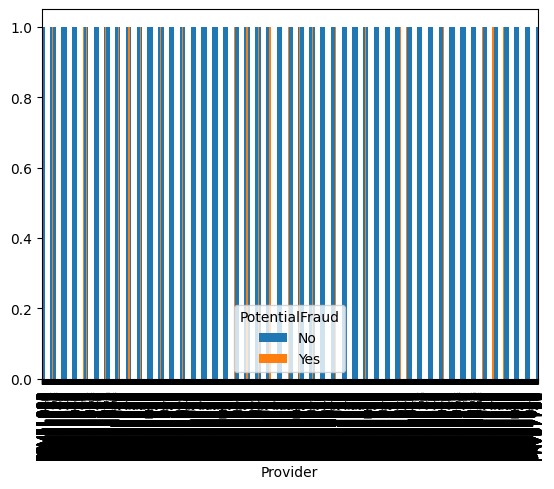

In [ ]:
crosstab.plot(kind='bar', stacked=True)#barplot between potential fraud and provider

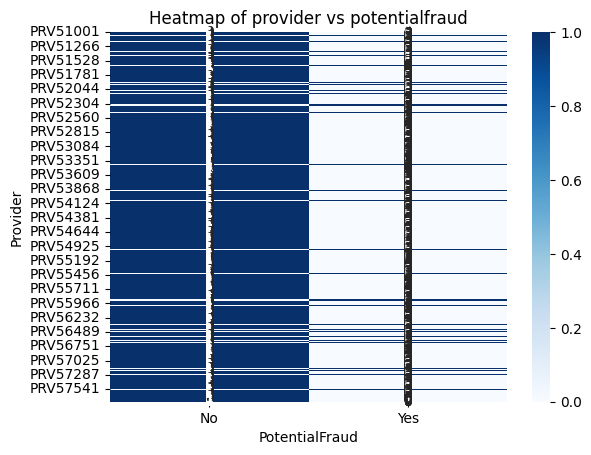

In [ ]:
sns.heatmap(crosstab, annot=True, cmap='Blues')
plt.title('Heatmap of provider vs potentialfraud')
plt.show()

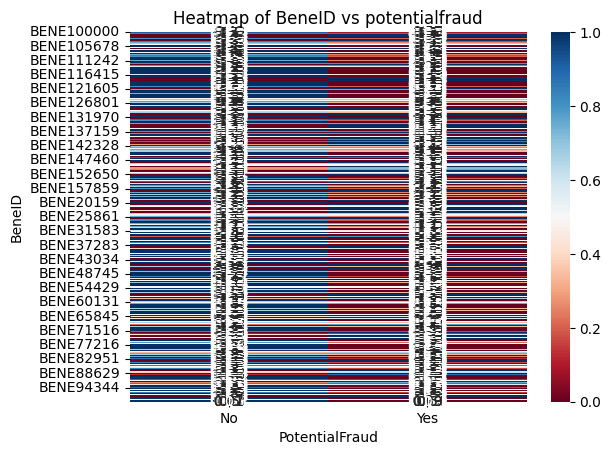

In [ ]:
crosstab = pd.crosstab(data['BeneID'], data['PotentialFraud'],normalize='index')
sns.heatmap(crosstab, annot=True, cmap='RdBu')
plt.title('Heatmap of BeneID vs potentialfraud')
plt.show()

In [ ]:
COLUMNS=['BeneID','ClaimID','ClaimStartDt','ClaimEndDt']
for col in COLUMNS:
  pd.crosstab(data[col],data['PotentialFraud'])#,normalize='index')
  print(f"Crosstab for {col} and {'PotentialFraud'}:")
  print(crosstab)
  print('\n')

Crosstab for BeneID and PotentialFraud:
PotentialFraud        No       Yes
BeneID                            
BENE100000      0.000000  1.000000
BENE100001      0.500000  0.500000
BENE100002      0.714286  0.285714
BENE100003      0.000000  1.000000
BENE100004      0.833333  0.166667
...                  ...       ...
BENE99994       0.714286  0.285714
BENE99995       0.500000  0.500000
BENE99997       0.714286  0.285714
BENE99998       0.000000  1.000000
BENE99999       1.000000  0.000000

[138556 rows x 2 columns]


Crosstab for ClaimID and PotentialFraud:
PotentialFraud        No       Yes
BeneID                            
BENE100000      0.000000  1.000000
BENE100001      0.500000  0.500000
BENE100002      0.714286  0.285714
BENE100003      0.000000  1.000000
BENE100004      0.833333  0.166667
...                  ...       ...
BENE99994       0.714286  0.285714
BENE99995       0.500000  0.500000
BENE99997       0.714286  0.285714
BENE99998       0.000000  1.000000
BENE99999      

Chi-Square Test for Independence For feature importance

In [ ]:

from scipy.stats import chi2_contingency
columns_to_test = ['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt','Provider']

for col in columns_to_test:

    crosstab = pd.crosstab(data[col], data['PotentialFraud'])

    # Perform Chi-Square test
    chi2, p, dof, expected = chi2_contingency(crosstab)

    print(f"Chi-square test for {col}:")
    print(f"Chi2: {chi2}, p-value: {p}")

    #  significance level (alpha)
    alpha = 0.05
    if p < alpha:
        print(f"There is a statistically significant association between {col} and PotentialFraud.")
    else:
        print(f"There is no statistically significant association between {col} and PotentialFraud.")
    print("-" * 20)

Chi-square test for BeneID:
Chi2: 281515.8454926205, p-value: 0.0
There is a statistically significant association between BeneID and PotentialFraud.
--------------------
Chi-square test for ClaimID:
Chi2: 558211.0000000002, p-value: 0.49937071893387835
There is no statistically significant association between ClaimID and PotentialFraud.
--------------------
Chi-square test for ClaimStartDt:
Chi2: 470.3509534114344, p-value: 0.006542351442877782
There is a statistically significant association between ClaimStartDt and PotentialFraud.
--------------------
Chi-square test for ClaimEndDt:
Chi2: 364.17569935074016, p-value: 0.5023335603736234
There is no statistically significant association between ClaimEndDt and PotentialFraud.
--------------------
Chi-square test for Provider:
Chi2: 558211.0, p-value: 0.0
There is a statistically significant association between Provider and PotentialFraud.
--------------------


In [ ]:
# Convert 'ClaimStartDt' and 'ClaimEndDt' to datetime objects
data['ClaimStartDt'] = pd.to_datetime(data['ClaimStartDt'], format='mixed')#different datetime format was there.
data['ClaimEndDt'] = pd.to_datetime(data['ClaimEndDt'])

<ipython-input-32-3c7ced097ebe>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['ClaimStartDt'].head(1000), palette="viridis")


<Axes: xlabel='ClaimStartDt', ylabel='count'>

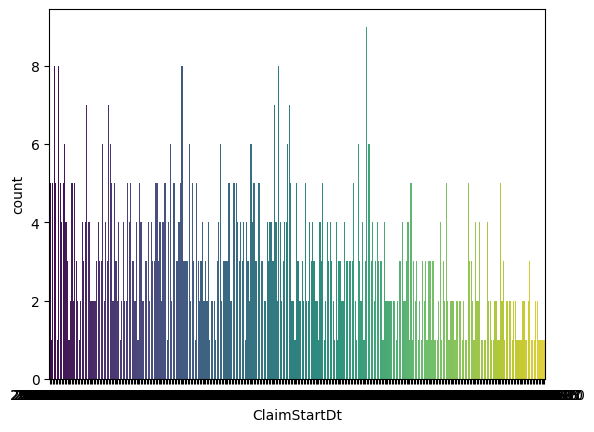

In [ ]:

sns.countplot(x=data['ClaimStartDt'].head(1000), palette="viridis")

<Axes: xlabel='ClaimStartDt'>

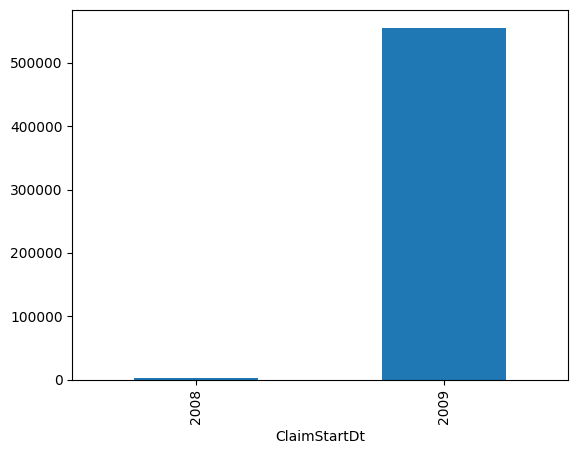

In [ ]:
data['ClaimStartDt'].dt.year.value_counts().sort_index().plot(kind='bar')#year wise count plot

This dataset contains details from 2008 and 2009.

<Axes: xlabel='ClaimEndDt'>

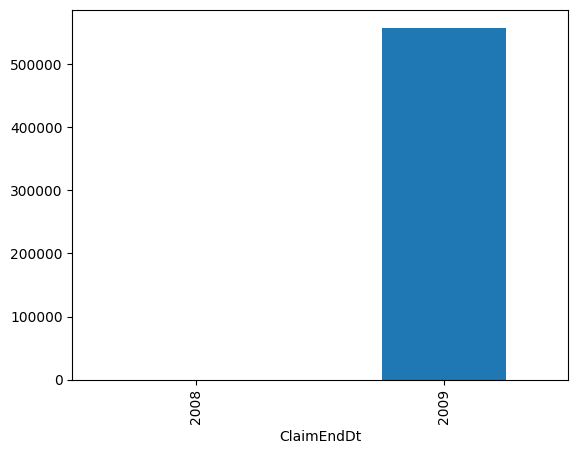

In [ ]:
data['ClaimEndDt'].dt.year.value_counts().sort_index().plot(kind='bar')#claimenddate yearwise

<ipython-input-35-a928f4b6038b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['ClaimEndDt'].head(1000), palette="viridis")


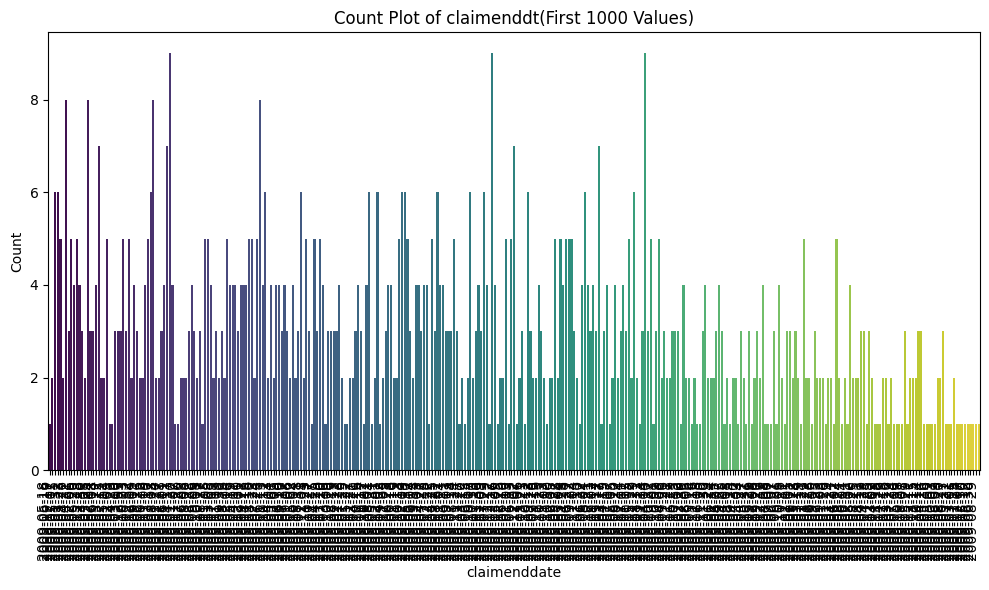

In [ ]:

# Create the countplot for the first 10000 claimend date
plt.figure(figsize=(10, 6))
sns.countplot(x=data['ClaimEndDt'].head(1000), palette="viridis")
plt.title('Count Plot of claimenddt(First 1000 Values)')
plt.xlabel('claimenddate')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

**UNIVARIATE AND BIVARIATE ANALYSIS OF COLUMNS FROM 6 TO 10**

In [ ]:
data.iloc[:,5:10].head()

,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt
0,42000,PHY383193,PHY378091,PHY389113,2009-05-04
1,90,PHY345302,NaN,NaN,NaN
2,20,PHY383007,NaN,PHY383007,NaN
3,100,PHY345302,NaN,PHY345302,NaN
4,200,PHY354616,PHY405310,PHY405310,NaN


In [ ]:
data.iloc[:,5:10].isna().sum()

,0
InscClaimAmtReimbursed,0
AttendingPhysician,1508
OperatingPhysician,443764
OtherPhysician,358475
AdmissionDt,517737


In [ ]:
data.iloc[:,5:10].dtypes

,0
InscClaimAmtReimbursed,int64
AttendingPhysician,object
OperatingPhysician,object
OtherPhysician,object
AdmissionDt,object


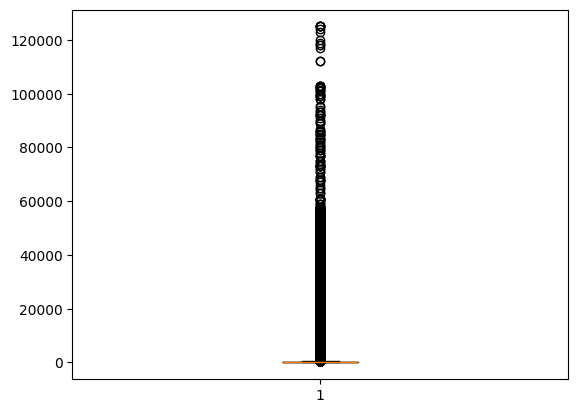

In [ ]:
plt.boxplot(data['InscClaimAmtReimbursed'])
plt.show()

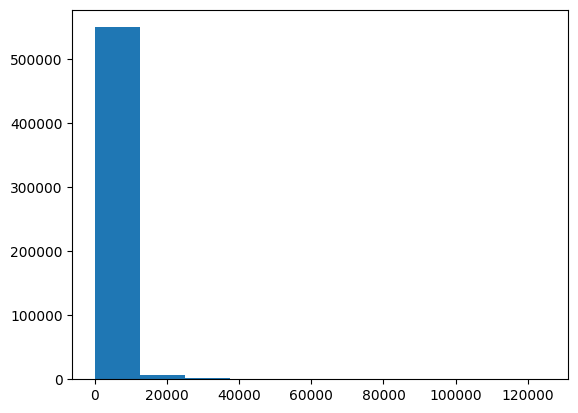

In [ ]:
plt.hist(data['InscClaimAmtReimbursed'])
plt.show()

In [ ]:
data.iloc[:,5:10].nunique()

,0
InscClaimAmtReimbursed,438
AttendingPhysician,82063
OperatingPhysician,35315
OtherPhysician,46457
AdmissionDt,398


In [ ]:
categorical_columns=['AttendingPhysician','OperatingPhysician','OtherPhysician','AdmissionDt']

In [ ]:
categorical_counts=data[categorical_columns].value_counts()

In [ ]:
categorical_counts

,,,,count
AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,
PHY393952,PHY348831,PHY416093,2008-12-01,2
PHY320770,PHY384367,PHY394578,2009-07-21,2
PHY358767,PHY356615,PHY358767,2009-04-19,2
PHY311170,PHY344962,PHY358696,2009-03-21,1
PHY393930,PHY345804,PHY432135,2009-06-17,1
...,...,...,...,...
PHY353698,PHY400317,PHY380019,2009-04-30,1
PHY353726,PHY425959,PHY318232,2009-05-25,1
PHY353728,PHY334910,PHY382728,2009-04-07,1


In [ ]:
mode = data[categorical_columns].mode().iloc[0]

In [ ]:
mode

,0
AttendingPhysician,PHY330576
OperatingPhysician,PHY330576
OtherPhysician,PHY412132
AdmissionDt,2009-02-10


<ipython-input-47-9ed6b2f48270>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['AttendingPhysician'], palette="viridis")


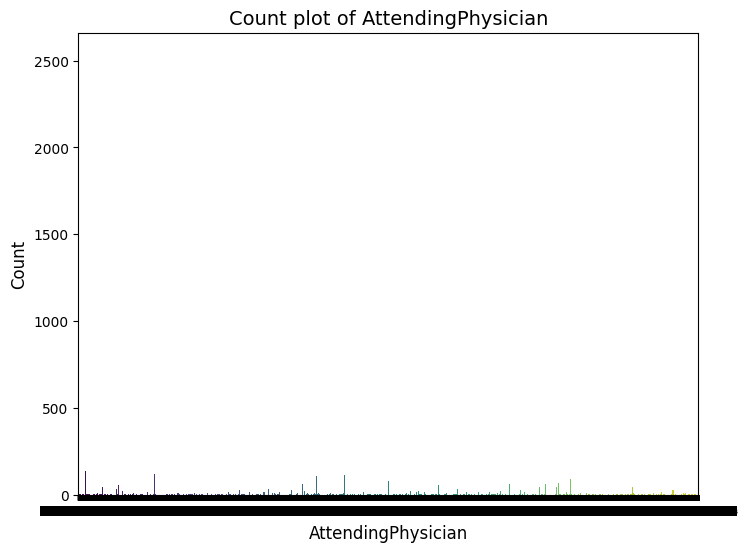

In [ ]:
plt.figure(figsize=(8, 6))

sns.countplot(x=data['AttendingPhysician'], palette="viridis")

plt.title('Count plot of AttendingPhysician', fontsize=14)

plt.xlabel('AttendingPhysician', fontsize=12)

plt.ylabel('Count', fontsize=12)

plt.show()

<ipython-input-48-77db49ba3e44>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['OperatingPhysician'], palette="viridis")


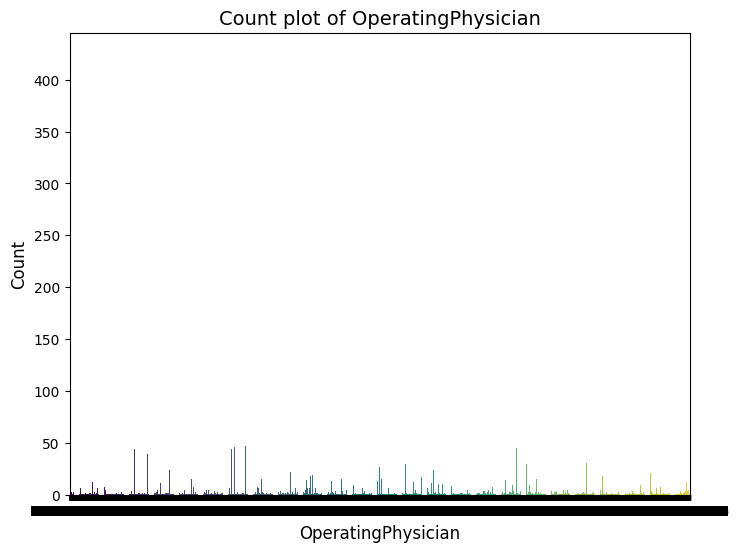

In [ ]:
plt.figure(figsize=(8, 6))

sns.countplot(x=data['OperatingPhysician'], palette="viridis")

plt.title('Count plot of OperatingPhysician', fontsize=14)

plt.xlabel('OperatingPhysician', fontsize=12)

plt.ylabel('Count', fontsize=12)

plt.show()

<ipython-input-49-fd6507d6fe54>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['OtherPhysician'], palette="viridis")


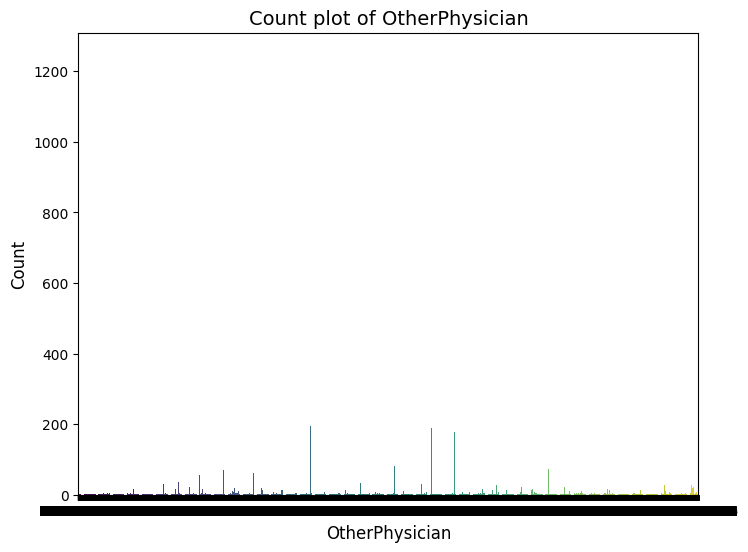

In [ ]:
plt.figure(figsize=(8, 6))

sns.countplot(x=data['OtherPhysician'], palette="viridis")

plt.title('Count plot of OtherPhysician', fontsize=14)

plt.xlabel('OtherPhysician', fontsize=12)

plt.ylabel('Count', fontsize=12)

plt.show()

In [ ]:
# Convert 'AdmissionDt' to datetime objects
data['AdmissionDt'] = pd.to_datetime(data['AdmissionDt'], format='mixed')#different datetime format was there.

<ipython-input-51-9c84f00dd471>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['AdmissionDt'].head(10000), palette="viridis")


<Axes: xlabel='AdmissionDt', ylabel='count'>

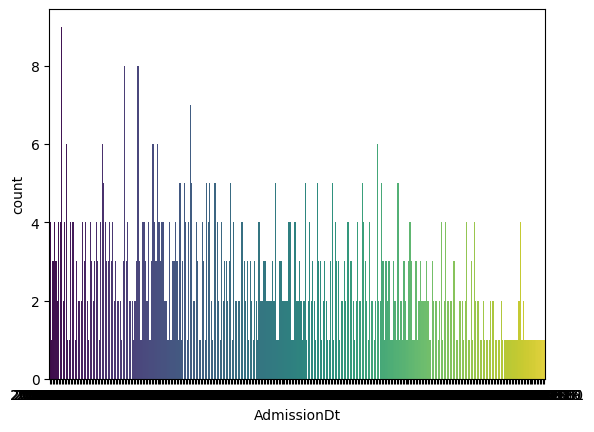

In [ ]:
sns.countplot(x=data['AdmissionDt'].head(10000), palette="viridis")

<Axes: xlabel='AdmissionDt'>

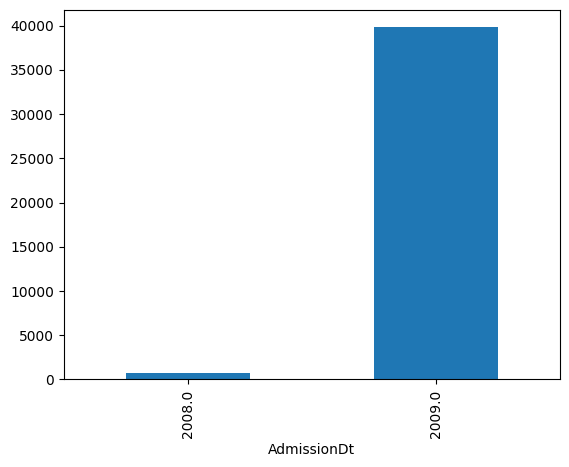

In [ ]:
data['AdmissionDt'].dt.year.value_counts().sort_index().plot(kind='bar')

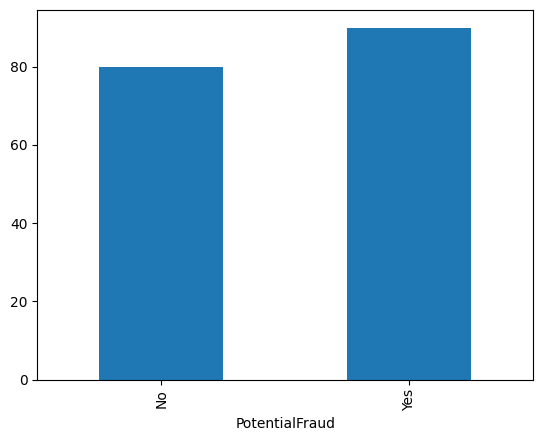

In [ ]:
data1=data.copy()
data.groupby('PotentialFraud')['InscClaimAmtReimbursed'].median().plot.bar()
plt.show()

In [ ]:
  COLUMNS=['AttendingPhysician', 'OperatingPhysician','OtherPhysician','AdmissionDt']
  for col in COLUMNS:
   crosstab=pd.crosstab(data[col],data['PotentialFraud'])#,normalize='index')
   print(f"Crosstab for {col} and {'PotentialFraud'}:")
   print(crosstab)
   print('\n')

Crosstab for AttendingPhysician and PotentialFraud:
PotentialFraud      No  Yes
AttendingPhysician         
PHY311001            2    0
PHY311002            0    1
PHY311004            2    0
PHY311005            2    0
PHY311006            1    0
...                 ..  ...
PHY434153            0    1
PHY434155            1    0
PHY434156            3    0
PHY434157            1    0
PHY434158            0    3

[82063 rows x 2 columns]


Crosstab for OperatingPhysician and PotentialFraud:
PotentialFraud      No  Yes
OperatingPhysician         
PHY311005            1    0
PHY311010            1    0
PHY311011            0    5
PHY311014            3    0
PHY311018            2    0
...                 ..  ...
PHY434146            2    0
PHY434149            1    0
PHY434150            3    0
PHY434154            1    0
PHY434155            4    0

[35315 rows x 2 columns]


Crosstab for OtherPhysician and PotentialFraud:
PotentialFraud  No  Yes
OtherPhysician         
PHY311001       

In [ ]:
from scipy.stats import chi2_contingency
columns_to_test = ['AttendingPhysician', 'OperatingPhysician','OtherPhysician','AdmissionDt']

for col in columns_to_test:

    crosstab = pd.crosstab(data[col], data['PotentialFraud'])

    # Perform Chi-Square test
    chi2, p, dof, expected = chi2_contingency(crosstab)

    print(f"Chi-square test for {col}:")
    print(f"Chi2: {chi2}, p-value: {p}")

    # You can set a significance level (alpha) to determine if the association is statistically significant.
    alpha = 0.05
    if p < alpha:
        print(f"There is a statistically significant association between {col} and PotentialFraud.")
    else:
        print(f"There is no statistically significant association between {col} and PotentialFraud.")
    print("-" * 20)

Chi-square test for AttendingPhysician:
Chi2: 548006.7733170441, p-value: 0.0
There is a statistically significant association between AttendingPhysician and PotentialFraud.
--------------------
Chi-square test for OperatingPhysician:
Chi2: 113043.59420347774, p-value: 0.0
There is a statistically significant association between OperatingPhysician and PotentialFraud.
--------------------
Chi-square test for OtherPhysician:
Chi2: 197146.9336764672, p-value: 0.0
There is a statistically significant association between OtherPhysician and PotentialFraud.
--------------------
Chi-square test for AdmissionDt:
Chi2: 447.4687957519541, p-value: 0.040599694879799184
There is a statistically significant association between AdmissionDt and PotentialFraud.
--------------------


UNIVARIATE AND BIVARIATE ANALYSIS OF 11 T0 15 TH COLUMN

In [ ]:
data.iloc[:,10:15].head()

In [ ]:
data.iloc[:,10:15].isnull().sum()

In [ ]:
data.iloc[:,10:15].columns

In [ ]:
data.iloc[:,10:15].dtypes

In [ ]:
data.iloc[:,10:15].info()

In [ ]:
plt.boxplot(data['DeductibleAmtPaid'])
plt.show()

In [ ]:
plt.hist(data['DeductibleAmtPaid'])
plt.show()

In [ ]:
data.iloc[:,10:15].nunique()

DISTINCT VALUE COUNT IN FIRST 5 FEATURES

In [ ]:
data['ClmAdmitDiagnosisCode'].value_counts().sum()

In [ ]:
data['DeductibleAmtPaid'].value_counts().sum()

In [ ]:
data['DischargeDt'].value_counts().sum()

In [ ]:
data['DiagnosisGroupCode'].value_counts().sum()

In [ ]:
data['ClmDiagnosisCode_1'].value_counts().sum()

547758

In [ ]:
categorical_columns=['ClmAdmitDiagnosisCode','DischargeDt','DiagnosisGroupCode','ClmDiagnosisCode_1']

In [ ]:
categorical_counts=data[categorical_columns].value_counts()

In [ ]:
categorical_counts

In [ ]:
mode = data[categorical_columns].mode().iloc[0]

In [ ]:
mode

In [ ]:
plt.figure(figsize=(8, 6))

sns.countplot(x=categorical_columns, palette="viridis")

plt.title('Bar Plot of Categorical Feature', fontsize=14)

plt.xlabel('Categories', fontsize=12)

plt.ylabel('Count', fontsize=12)

plt.show()

In [ ]:
#countplot
sns.countplot(x=data['PotentialFraud'], palette="viridis")

BIVARIATE ANALYSIS...FINDING RELATONSHIP WITH TARGET

In [ ]:
data1=data.copy()
data.groupby('PotentialFraud')['DeductibleAmtPaid'].median().plot.bar()
plt.show()

In [ ]:
data1=data.copy()
data.groupby('PotentialFraud')['DeductibleAmtPaid'].mean().plot.bar()
plt.show()

CROSSTAB IS USED TO FIND RELATIONSHIP BETWEEN CATEGORICAL COLUMNS

In [ ]:
crosstab = pd.crosstab(data['ClmAdmitDiagnosisCode'], data['PotentialFraud'])#,normalize='index')#count of ClmAdmitDiagnosisCode in potentialfraud
print(crosstab)

In [ ]:
crosstab = pd.crosstab(data['ClmAdmitDiagnosisCode'], data['PotentialFraud'],normalize='index')
print(crosstab)#percentage occurance of provider in  potential fraud

In [ ]:
crosstab.plot(kind='bar', stacked=True)#barplot between potential fraud and ClmAdmitDiagnosisCode

In [ ]:
sns.heatmap(crosstab, annot=True, cmap='Blues')
plt.title('Heatmap of ClmAdmitDiagnosisCode vs provider fraud')
plt.show()

In [ ]:
COLUMNS=['DischargeDt','DiagnosisGroupCode','ClmDiagnosisCode_1']
for col in COLUMNS:
  pd.crosstab(data[col],data['PotentialFraud'])#,normalize='index')
  print(f"Crosstab for {col} and {'PotentialFraud'}:")
  print(crosstab)
  print('\n')

Chi-Square Test for Independence For feature importance

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
columns_to_test = ['ClmAdmitDiagnosisCode','DischargeDt','DiagnosisGroupCode','ClmDiagnosisCode_1']

for col in columns_to_test:

    crosstab = pd.crosstab(data[col], data['PotentialFraud'])

    # Perform Chi-Square test
    chi2, p, dof, expected = chi2_contingency(crosstab)

    print(f"Chi-square test for {col}:")
    print(f"Chi2: {chi2}, p-value: {p}")

    # You can set a significance level (alpha) to determine if the association is statistically significant.
    alpha = 0.05
    if p < alpha:
        print(f"There is a statistically significant association between {col} and PotentialFraud.")
    else:
        print(f"There is no statistically significant association between {col} and PotentialFraud.")
    print("-" * 20)

# Convert 'DischargeDt' to datetime objects

In [ ]:
data['DischargeDt'] = pd.to_datetime(data['DischargeDt'])

In [ ]:
sns.countplot(x=data['DischargeDt'].head(1000), palette="viridis")

In [ ]:
data['DischargeDt'].dt.year.value_counts().sort_index().plot(kind='bar')#year wise count plot

In [ ]:
# Create the countplot for the first 10000 claimend date
plt.figure(figsize=(10, 6))
sns.countplot(x=data['DischargeDt'].head(1000), palette="viridis")
plt.title('Count Plot of claimenddt(First 1000 Values)')
plt.xlabel('dischargedate')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

***UNIVARIATE AND BIVARIATE  ANALYSIS OF 16 T0 20 TH COLUMN***

In [ ]:
data.iloc[:,15:20].head()


In [ ]:
data.iloc[:,15:20].columns

In [ ]:
data.iloc[:,15:20].info()

In [ ]:
data.iloc[:,15:20].isnull().sum()

There are null values in these 5 columns,we will handle this in preprocessing stage.

In [ ]:
data.iloc[:,15:20].dtypes

Total unique values in these columns

In [ ]:
categorical_columns=['ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6']
for feature in categorical_columns :
    print("The feature is {} and number of labels are {}".format(feature,len(data[feature].unique())))

total non null value count

In [ ]:
for feature in categorical_columns :
    print("The feature is {} and number of non-null values are {}".format(feature,data[feature].value_counts().sum()))

In [ ]:
sns.countplot(x=data['ClmDiagnosisCode_2'], palette="viridis")


In [ ]:
#crosstab to find relationship with the target
for col in categorical_columns:
  pd.crosstab(data[col],data['PotentialFraud'])
  print(f"Crosstab for {col} and {'PotentialFraud'}:")
  print(crosstab)
  print('\n')

In [ ]:

from scipy.stats import chi2_contingency


for col in categorical_columns :

    crosstab = pd.crosstab(data[col], data['PotentialFraud'])

    # Perform Chi-Square test
    chi2, p, dof, expected = chi2_contingency(crosstab)

    print(f"Chi-square test for {col}:")
    print(f"Chi2: {chi2}, p-value: {p}")

    #  significance level (alpha)
    alpha = 0.05
    if p < alpha:
        print(f"There is a statistically significant association between {col} and PotentialFraud.")
    else:
        print(f"There is no statistically significant association between {col} and PotentialFraud.")
    print("-" * 20)

All columns from 16 to 20 has statistically significant association with target

In [ ]:

categorical_columns = ['ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
                       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6']

for col in categorical_columns:
    plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
    sns.countplot(x=col, hue='PotentialFraud', data=data, palette="viridis")
    plt.title(f'Count Plot of {col} vs. PotentialFraud')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()

**univariate and bivariate analysis from 21 to 25 columns**

In [ ]:
data.iloc[:,20:25]

In [ ]:
data.iloc[:,20:25].isna().sum()

In [ ]:
data.iloc[:,20:25].dtypes

In [ ]:
plt.boxplot(data['ClmProcedureCode_1'])
plt.show()

In [ ]:
### boxplot displays only after handling missing values

In [ ]:
plt.hist(data['ClmProcedureCode_1'])
plt.show()

In [ ]:
data.iloc[:,20:25].nunique()

In [ ]:
categorical_columns=['ClmDiagnosisCode_7','ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10']

In [ ]:
categorical_counts=data[categorical_columns].value_counts()

In [ ]:
categorical_counts

In [ ]:
mode = data[categorical_columns].mode().iloc[0]

In [ ]:
mode

In [ ]:
plt.figure(figsize=(8, 6))

sns.countplot(x=data['ClmDiagnosisCode_7'], palette="viridis")

plt.title('Count plot of ClmDiagnosisCode_7', fontsize=14)

plt.xlabel('ClmDiagnosisCode_7', fontsize=12)

plt.ylabel('Count', fontsize=12)

plt.show()

In [ ]:
plt.figure(figsize=(8, 6))

sns.countplot(x=data['ClmDiagnosisCode_8'], palette="viridis")

plt.title('Count plot of ClmDiagnosisCode_8', fontsize=14)

plt.xlabel('ClmDiagnosisCode_8', fontsize=12)

plt.ylabel('Count', fontsize=12)

plt.show()

In [ ]:
plt.figure(figsize=(8, 6))

sns.countplot(x=data['ClmDiagnosisCode_9'], palette="viridis")

plt.title('Count plot of ClmDiagnosisCode_9', fontsize=14)

plt.xlabel('ClmDiagnosisCode_9', fontsize=12)

plt.ylabel('Count', fontsize=12)

plt.show()

In [ ]:
plt.figure(figsize=(8, 6))

sns.countplot(x=data['ClmDiagnosisCode_10'], palette="viridis")

plt.title('Count plot of ClmDiagnosisCode_10', fontsize=14)

plt.xlabel('ClmDiagnosisCode_10', fontsize=12)

plt.ylabel('Count', fontsize=12)

plt.show()

In [ ]:
data1=data.copy()
data.groupby('PotentialFraud')['ClmProcedureCode_1'].median().plot.bar()
plt.show()

In [ ]:
for col in categorical_columns:
  pd.crosstab(data[col],data['PotentialFraud'])
  print(f"Crosstab for {col} and {'PotentialFraud'}:")
  print(crosstab)
  print('\n')

In [ ]:
from scipy.stats import chi2_contingency
columns_to_test = ['ClmDiagnosisCode_7','ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10']

for col in columns_to_test:

    crosstab = pd.crosstab(data[col], data['PotentialFraud'])

    # Perform Chi-Square test
    chi2, p, dof, expected = chi2_contingency(crosstab)

    print(f"Chi-square test for {col}:")
    print(f"Chi2: {chi2}, p-value: {p}")

    # You can set a significance level (alpha) to determine if the association is statistically significant.
    alpha = 0.05
    if p < alpha:
        print(f"There is a statistically significant association between {col} and PotentialFraud.")
    else:
        print(f"There is no statistically significant association between {col} and PotentialFraud.")
    print("-" * 20)

UNIVARIATE AND BIVARIATE ANALYSIS OF 26 T0 30 TH COLUMN

In [ ]:
data.iloc[:,25:30]

In [ ]:
data.iloc[:,25:30].head()

In [ ]:
data.iloc[:,25:30].columns

In [ ]:
data.iloc[:,25:30].info()

In [ ]:
data.iloc[:,25:30].isnull().sum()

In [ ]:
data.iloc[:,25:30].dtypes

In [ ]:
data.iloc[:,25:30].nunique()

In [ ]:
plt.boxplot(data.iloc[:,25:29])
plt.figure(figsize=(12,8))
plt.show()

In [ ]:
COLUMNS = ['ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
           'ClmProcedureCode_5']

plt.figure(figsize=(10, 6))  # Set figure size
plt.boxplot([data[col] for col in COLUMNS], labels=COLUMNS)
plt.title('Boxplots for Selected Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

## boxplot is empty due to missing values

In [ ]:
plt.figure(figsize=(10, 6))  # Set figure size
for col in COLUMNS:
    plt.hist(data[col], bins=20, alpha=1, label=col)  # Adjust alpha for transparency
plt.title('Histograms for Selected Columns')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

'ClmProcedureCode_6' is empty, nothing to show- will remove this column during preprocessing

In [ ]:
data1=data.copy()
data.groupby('PotentialFraud')['ClmProcedureCode_2'].median().plot.bar()
plt.show()

In [ ]:
data1=data.copy()
data.groupby('PotentialFraud')['ClmProcedureCode_3'].median().plot.bar()
plt.show()

In [ ]:
data1=data.copy()
data.groupby('PotentialFraud')['ClmProcedureCode_4'].median().plot.bar()
plt.show()

In [ ]:
data1=data.copy()
data.groupby('PotentialFraud')['ClmProcedureCode_5'].median().plot.bar()
plt.show()

Univariate and bivariate analysis of 31 to 35

In [ ]:
data.iloc[:,30:35].head()

In [ ]:
data.iloc[:,30:35].columns


In [ ]:
data.iloc[:,30:35].info()

In [ ]:
data.iloc[:,30:35].isnull().sum()

In [ ]:
data.iloc[:,30:35].dtypes

In [ ]:
categorical_columns=['DOB', 'DOD','RenalDiseaseIndicator']
for feature in categorical_columns :
    print("The feature is {} and number of non-null values are {}".format(feature,data[feature].value_counts().sum()))

In [ ]:
data.iloc[:,30:35].nunique()#no of unique values

In [ ]:
data['Race'].unique()

In [ ]:
data['RenalDiseaseIndicator'].unique()

In [ ]:
data['Gender'].unique()

In [ ]:
sns.histplot(data['RenalDiseaseIndicator'])

In [ ]:
sns.histplot(data['Gender'])

In [ ]:
sns.histplot(data['Race'])

convert date to datetime variable

In [ ]:
data['DOB']= pd.to_datetime(data['DOB'],errors='coerce')
data['DOD']=pd.to_datetime(data['DOD'],errors='coerce')

In [ ]:
data['DOB'].dtypes
data['DOD'].dtypes

Pandas uses NumPy's datetime64 type for efficiency, and that's why the dtype shows as '<M8[ns]'

In [ ]:
data['DOB'].dt.year.value_counts().sort_index().plot(kind='bar')


In [ ]:

# Create the countplot for the first 10000 dod
plt.figure(figsize=(10, 6))
sns.countplot(x=data['DOD'].head(10000), palette="viridis")
plt.title('Count Plot of DOD(First 1000 Values)')
plt.xlabel('Date of death')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Bivariate analysis: DOB vs. PotentialFraud
# Create a cross-tabulation
dob_fraud_crosstab = pd.crosstab(data['DOB'].dt.year, data['PotentialFraud'])

# Plot the cross-tabulation
dob_fraud_crosstab.plot(kind='bar', figsize=(12, 6))
plt.title('DOB Year vs. PotentialFraud')
plt.xlabel('Year of Birth')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='PotentialFraud')
plt.tight_layout()
plt.show()


In [ ]:
# Bivariate analysis: DOD vs. PotentialFraud
# Create a cross-tabulation
dod_fraud_crosstab = pd.crosstab(data['DOD'], data['PotentialFraud'])

# Plot the cross-tabulation
dod_fraud_crosstab.plot(kind='bar')#figsize=(12, 6))
plt.title('DOD Year vs. PotentialFraud')
plt.xlabel('Year of death')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='PotentialFraud')
plt.tight_layout()
plt.show()


In [ ]:
#crosstab plot between renaldiseaseindicator and potentialfraud

crosstab = pd.crosstab(data['RenalDiseaseIndicator'], data['PotentialFraud'])
print(crosstab)
crosstab.plot(kind='bar')# stacked=True)
plt.title('Crosstab Plot: RenalDiseaseIndicator vs. PotentialFraud')
plt.xlabel('RenalDiseaseIndicator')
plt.ylabel('Count')
plt.show()

In [ ]:
#barplot of RACE and GENDER with potential fraud
sns.countplot(x='Race', hue='PotentialFraud', data=data)

In [ ]:
sns.countplot(x='Gender',hue='PotentialFraud',data=data)

In [ ]:
#chi-square test
from scipy.stats import chi2_contingency

columns_to_test=['DOB','DOD','RenalDiseaseIndicator']

for col in columns_to_test:

    contingency_table = pd.crosstab(data[col], data['PotentialFraud'])


    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square test for {col} (without grouping):")
    print(f"Chi2: {chi2}, p-value: {p}")

    alpha = 0.05
    if p < alpha:
        print(f"There is a statistically significant association between {col} and PotentialFraud.")
    else:
        print(f"There is no statistically significant association between {col} and PotentialFraud.")
    print("-" * 20)

DOB ,Renaldisease indicator,and DOD columns have statistically significant association with target column.

**univariate and bivariate analysis from 36 to 40 columns**


In [ ]:
data.iloc[:,35:40]

In [ ]:
data.iloc[:,35:40].isna().sum()

In [ ]:
data.iloc[:,35:40].dtypes

In [ ]:
plt.boxplot(data.iloc[:,35:40])
plt.figure(figsize=(12,8))
plt.show()

In [ ]:
plt.hist(data.iloc[:,35:40])
plt.show()

In [ ]:
data.iloc[:,35:40].nunique()

In [ ]:
data1=data.copy()
data.groupby('PotentialFraud')['State'].median().plot.bar()
plt.show()

In [ ]:
data1=data.copy()
data.groupby('PotentialFraud')['County'].median().plot.bar()
plt.show()

In [ ]:
data1=data.copy()
data.groupby('PotentialFraud')['NoOfMonths_PartACov'].median().plot.bar()
plt.show()


In [ ]:
data1=data.copy()
data.groupby('PotentialFraud')['NoOfMonths_PartBCov'].median().plot.bar()
plt.show()

In [ ]:
data1=data.copy()
data.groupby('PotentialFraud')['ChronicCond_Alzheimer'].median().plot.bar()
plt.show()

univariate and bivariate analysis from 41 to 45 columns

In [ ]:
data.iloc[:,40:45]

In [ ]:
data.iloc[:,40:45].isna().sum()

In [ ]:
data.iloc[:,40:45].dtypes

In [ ]:
plt.boxplot(data.iloc[:,40:45])
plt.figure(figsize=(12,8))
plt.show()

In [ ]:
plt.hist(data.iloc[:,40:45])
plt.show()

In [ ]:
data.iloc[:,40:45].nunique()

In [ ]:
data1=data.copy()
data.groupby('PotentialFraud')['ChronicCond_Heartfailure'].median().plot.bar()
plt.show()

In [ ]:
data1=data.copy()
data.groupby('PotentialFraud')['ChronicCond_KidneyDisease'].median().plot.bar()
plt.show()

In [ ]:
data1=data.copy()
data.groupby('PotentialFraud')['ChronicCond_Cancer'].median().plot.bar()
plt.show()

In [ ]:
data1=data.copy()
data.groupby('PotentialFraud')['ChronicCond_ObstrPulmonary'].median().plot.bar()
plt.show()

In [ ]:
data1=data.copy()
data.groupby('PotentialFraud')['ChronicCond_Depression'].median().plot.bar()
plt.show()

UNIVARIATE AND BIVARIATE OF COLUMN 46,47,48

In [ ]:
data.iloc[:,45:48].head()

In [ ]:
data.iloc[:,45:48].columns

In [ ]:
data.iloc[:,45:48].info()

In [ ]:
data.iloc[:,45:48].nunique()

These are discrete integer columnsd with no null
 values

In [ ]:
sns.histplot(data['ChronicCond_Alzheimer'])

In [ ]:
sns.histplot(data['ChronicCond_Diabetes'])

In [ ]:
sns.histplot(data['ChronicCond_IschemicHeart'])

In [ ]:

sns.countplot(x='ChronicCond_Alzheimer', hue='PotentialFraud', data=data)

In [ ]:

sns.countplot(x='ChronicCond_Diabetes', hue='PotentialFraud', data=data)

In [ ]:

sns.countplot(x='ChronicCond_IschemicHeart', hue='PotentialFraud', data=data)

univariate and bivariate analysis of 48-54 columns

In [ ]:
data.iloc[:,48:54]

In [ ]:
data.iloc[:,48:54].isna().sum()

In [ ]:
data.iloc[:,48:54].dtypes

In [ ]:
plt.boxplot(data.iloc[:,48:54])
plt.figure(figsize=(12,8))
plt.show()

In [ ]:
plt.hist(data.iloc[:,48:54])
plt.show()

In [ ]:
data.iloc[:,48:54].nunique()

In [ ]:
data1=data.copy()
data.groupby('PotentialFraud')['ChronicCond_rheumatoidarthritis'].median().plot.bar()
plt.show()

In [ ]:
data1=data.copy()
data.groupby('PotentialFraud')['ChronicCond_stroke'].median().plot.bar()
plt.show()

In [ ]:
data1=data.copy()
data.groupby('PotentialFraud')['IPAnnualReimbursementAmt'].median().plot.bar()
plt.show()

In [ ]:
data1=data.copy()
data.groupby('PotentialFraud')['IPAnnualReimbursementAmt'].mean().plot.bar()
plt.show()

In [ ]:
data1=data.copy()
data.groupby('PotentialFraud')['IPAnnualDeductibleAmt'].median().plot.bar()
plt.show()

In [ ]:
data1=data.copy()
data.groupby('PotentialFraud')['IPAnnualDeductibleAmt'].mean().plot.bar()
plt.show()

In [ ]:
data1=data.copy()
data.groupby('PotentialFraud')['OPAnnualReimbursementAmt'].median().plot.bar()
plt.show()

In [ ]:
data1=data.copy()
data.groupby('PotentialFraud')['OPAnnualDeductibleAmt'].median().plot.bar()
plt.show()

In [ ]:
# Pairplot for numerical features
sns.pairplot(data[['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5','Gender', 'Race', 'State']])#, hue='PotentialFraud', diag_kind='kde')  # Optional: `hue` for color-coding by target
#plt.show()


**BV analysis of numerical features using heatmap**

In [ ]:
correlation_matrix = data[numerical_features].corr()
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Analysing target column

In [ ]:
data['PotentialFraud'].head()

In [ ]:
data['PotentialFraud'].dtypes

In [ ]:
data['PotentialFraud'].isnull().sum()

In [ ]:
data['PotentialFraud'].value_counts()

propotion of yes and no in target

In [ ]:
data['PotentialFraud'].value_counts(normalize=True)

In [ ]:
sns.histplot(data['PotentialFraud'])

target is biased towards 'NO'